In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'Malgu Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('data/school_report_ver2.csv', encoding='cp949')
df.head(1)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No


In [4]:
df.columns
# 컬럼의 내용을 한꺼번에 볼 수 있다. 

Index(['성별', '전공', '신장', '몸무게', '1학년평균성적', '2학년평균성적', '3학년평균성적', '취미',
       '일평균학습시간', '집중공부시간', '기대연봉', '전공만족여부', '전공관련취업선호도', '일평균소셜미디어사용시간',
       '통학시간', '학업스트레스', '교우관계스트레스', '아르바이트여부', '방과후수업여부'],
      dtype='object')

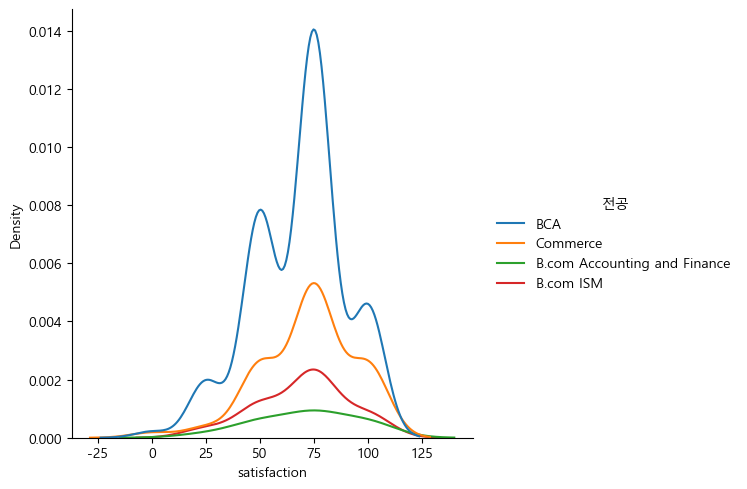

In [7]:
df['satisfaction'] = df['전공관련취업선호도'].str.replace("%","")
df['satisfaction'] = df['satisfaction'].astype('int64')
sns.displot(data=df, kind='kde', x='satisfaction', hue='전공')
plt.rc('font', family='Malgun Gothic')

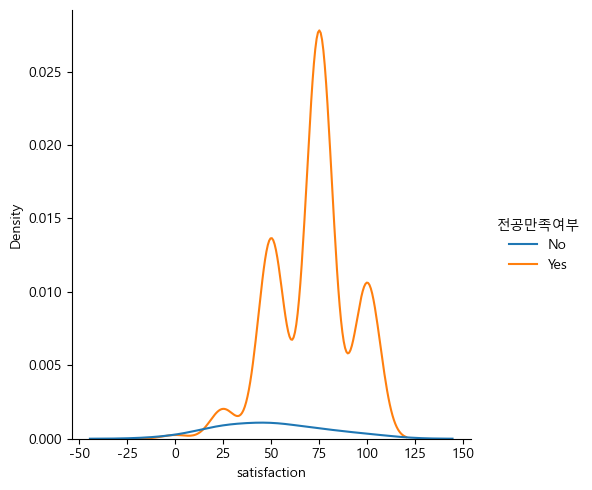

In [6]:
sns.displot(data=df, kind='kde', x='satisfaction', hue='전공만족여부')